# Comp 6934 Winter 2025 Note 10

by E Brown.



Both the t-test and linear regression are based on the idea that the population we are making samples from (making observations from) are normally distributed. Let's review the shape of the normal distribution:

### Student's T

Sampling distribution of the mean: in classical experiments, we try to estimate the mean of a distribution of a population from the mean of a sample of the population. But how good is this estimate?

The student's t-test is one of the first stat tests people learn. It was developed by [W.S. Gosset](https://www.encyclopediaofmath.org/index.php/Gosset,_William_Sealy) for testing the chemical composition of beer at Guiness. 

Before Gosset, it was known that mean of a sample tended to the mean of the population, and was in fact the sample mean is normally distributed about the overall population mean. <span class=notcovered>We won't develop the math to prove this (do an advanced stats course!)</span> but we can observe it with a numerical experiment as follows:

a. generate a population of values and examine its distribution.
b. take a bunch of random samples and calculate their means.
c. plot the means and see how they are distributed compared to the population we started with.

#### a. The population

In [27]:
from scipy.stats import uniform, norm
import numpy as np
import matplotlib.pyplot as plt

population1 = uniform(2,5).rvs(5000) # 500 random numbers uniformly distributed between 2 and 7
population2 = norm(20,2).rvs(5000) # 500 random numbers normally distributed with mean of 20 and variance of 2
population = np.append(population1, population2)

In [39]:
population.mean() # numpy arrays have a mean method

np.float64(12.24878227359735)

Text(0, 0.5, 'count')

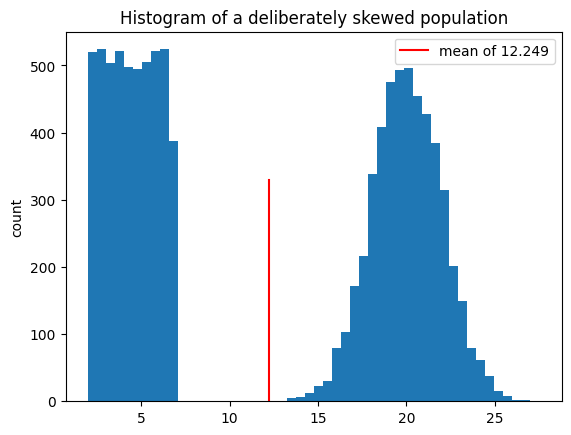

In [41]:
plt.hist(population, bins=50)
plt.axvline(x = population.mean(), ymax = 0.60, color = "red", label = f"mean of {population.mean():.3f}")
plt.legend()
plt.title("Histogram of a deliberately skewed population" )
plt.ylabel("count")

#### b. some samples

In [30]:
np.random.choice(population, 10) # how to sample 10 values

array([21.14537377, 19.68831227,  6.72449186,  4.53040537, 20.48282149,
        4.47485399, 22.48351755, 22.03718929, 23.28493772,  3.29600676])

In [31]:
# 500 samples of size 10
samples = [np.random.choice(population, 10) for _ in range(500)]
samples

[array([22.23325789, 18.13694789, 20.52057204, 21.0824813 ,  5.0941626 ,
        20.78806232,  2.76697043, 20.30581263,  4.61504019, 22.18138805]),
 array([18.8657708 ,  3.27037243, 16.84269097, 17.58017133, 22.03360101,
         3.72636581, 25.89080375,  5.91313708,  4.90121655,  3.94420239]),
 array([ 4.85649524, 21.16602094, 22.40469738,  5.62038064, 19.24659815,
         4.55609446,  2.0472522 , 18.84536218,  5.47884963,  2.31684413]),
 array([18.51208373,  2.92688464, 20.08111739,  6.94790141,  2.57043071,
         6.74516372, 21.2329567 , 21.44429405, 20.01757477,  4.23033113]),
 array([22.13753018, 21.19414502,  4.13047633,  6.40465822, 20.74366342,
        22.01020524,  4.79422618, 22.10503977,  2.97896417,  6.12029081]),
 array([ 5.53325242,  2.86536448,  5.12010692, 20.76557758,  4.93700764,
        17.61683226, 22.76981208, 23.13448078,  4.55070908,  4.45832993]),
 array([16.02674929,  6.48158576,  4.78119146, 22.19751071, 20.76110285,
        16.51498442,  6.24339922,  3.63

In [32]:
# find the mean of each sample
sample_means = [samp.mean() for samp in samples]
sample_means

[np.float64(15.772469535487721),
 np.float64(12.296833211444893),
 np.float64(10.653859495675826),
 np.float64(12.470873826408766),
 np.float64(13.261919934848844),
 np.float64(11.175147316727982),
 np.float64(12.284043540771247),
 np.float64(12.826895247558127),
 np.float64(12.968018617193596),
 np.float64(12.478441440610828),
 np.float64(12.226661713232719),
 np.float64(11.933023148286933),
 np.float64(8.99747683994348),
 np.float64(14.027122422870542),
 np.float64(8.344174599395838),
 np.float64(11.193277179328254),
 np.float64(12.764655435967613),
 np.float64(11.150506564385761),
 np.float64(15.531073265664991),
 np.float64(11.504681151389715),
 np.float64(18.583473744560006),
 np.float64(14.248833364983977),
 np.float64(15.182672618354761),
 np.float64(13.418224082464821),
 np.float64(9.70312381547917),
 np.float64(12.102652711051833),
 np.float64(11.067303412896827),
 np.float64(11.145187683875552),
 np.float64(13.093628641851021),
 np.float64(9.404648617774205),
 np.float64(10.0

#### c. how are the sample means distributed?

Text(0, 0.5, 'count')

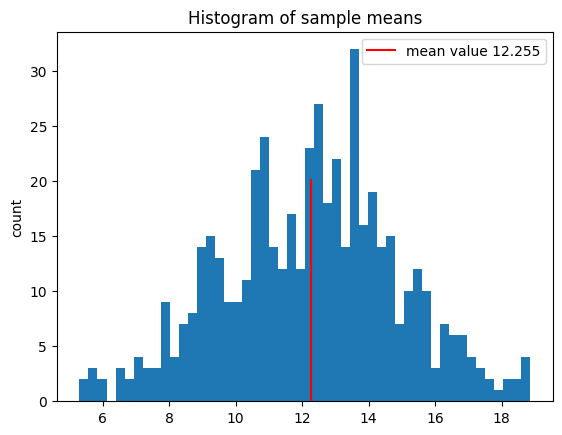

In [33]:
mumu = np.array(sample_means).mean()

plt.hist(sample_means, bins=50)
plt.axvline(x = mumu, ymax = 0.60, color = "red", label = f"mean value {mumu:.3f}")
plt.legend()
plt.title("Histogram of sample means" )
plt.ylabel("count")

Before student's T, the practice was to obtain as large a sample as possible to get the best possible estimate of the population mean.  Gosset was using rather small samples, so he figured out how the variance of sample means was affected by the sample size, and from there how the distribution of sample means was affected. This distribution (which is called the *sampling distribution of the mean*) allowed him to quantify how risky it was to infer population means based on his small samples.


In [34]:
from scipy.stats import t
import pandas as pd

degrees_of_freedom = [2, 5,20,100] # the std of the t distribution depends on the sample size ~ D of F

t_value = np.linspace(-5,5,300)
tFrame = pd.DataFrame(data=t_value, columns=['t_value'])

for d_of_f in degrees_of_freedom:
    tFrame[f"DoF {d_of_f}"] = [t(d_of_f).pdf(tval) for tval in tFrame['t_value']]

tFrame["normal"] = [norm.pdf(tval) for tval in tFrame['t_value']]
tFrame

,t_value,DoF 2,DoF 5,DoF 20,DoF 100,normal
0,-5.000000,0.007128,0.001757,0.000079,0.000005,0.000001
1,-4.966555,0.007262,0.001817,0.000085,0.000006,0.000002
2,-4.933110,0.007399,0.001880,0.000092,0.000007,0.000002
3,-4.899666,0.007540,0.001944,0.000100,0.000008,0.000002
4,-4.866221,0.007684,0.002011,0.000108,0.000009,0.000003
...,...,...,...,...,...,...
295,4.866221,0.007684,0.002011,0.000108,0.000009,0.000003
296,4.899666,0.007540,0.001944,0.000100,0.000008,0.000002
297,4.933110,0.007399,0.001880,0.000092,0.000007,0.000002
298,4.966555,0.007262,0.001817,0.000085,0.000006,0.000002


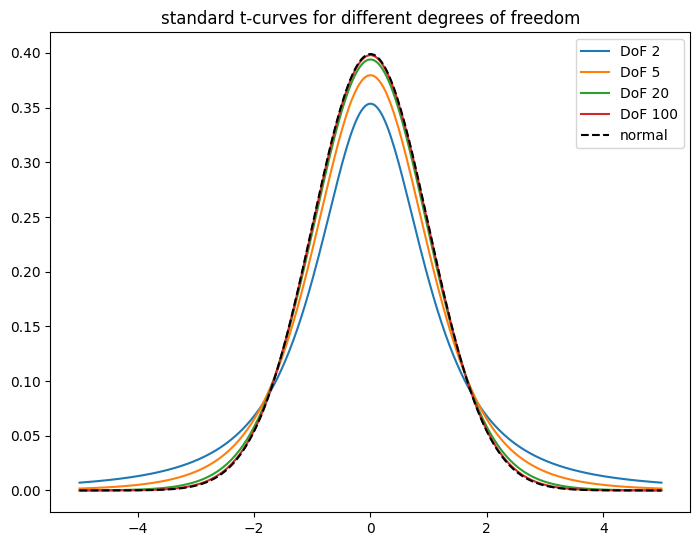

In [35]:
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot('t_value', 'DoF 2', data=tFrame)
ax.plot('t_value', 'DoF 5', data=tFrame)
ax.plot('t_value', 'DoF 20', data=tFrame)
ax.plot('t_value', 'DoF 100', data=tFrame)
ax.plot('t_value', 'normal', linestyle='--', color="black", data=tFrame)
ax.legend()
ax.set_title("standard t-curves for different degrees of freedom")

fig

### A simple t-test

The following Student's t-test from numpy.stats is constructed for two independent samples assuming the population they are drawn from has equal variances. (All these assumption affect the degrees of freedom used). We could construct the t-test from he t-curse ourselves, but it's easier just to use the numpy method. 

*Welch's t-test with equal variances*, which is show below, by graphing the false rejection (type 1 error) area for the null hypothesis.

There are many statistical tests that can use the t-distribution. Here we compare means of two groups of observations. The null hypothesis is the difference between the two population means is zero, and we test that using the sample means from the two sample drawn from two populations.

In [36]:
import scipy.stats as stats

# some random data stands in for observations
sample1 = norm.rvs(size=20)
sample2 = norm.rvs(size=20)

# test if the populations the samples are from have the same mean?
results = stats.ttest_ind(sample1, sample2)
results

TtestResult(statistic=np.float64(-0.02785228398067964), pvalue=np.float64(0.9779257284823424), df=np.float64(38.0))

Text(0.5, 1.0, 't-curve for DoF 38')

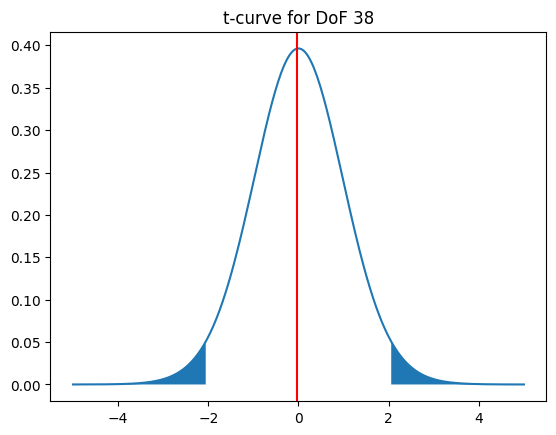

In [37]:
# plot where the statistic falls on the t-curve
tFrame['DoF 38'] = [t(38).pdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 38 cdf'] = [t(38).cdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 38 0.95 tails'] = (tFrame['DoF 38 cdf'] < 0.025) | (tFrame['DoF 38 cdf'] > 0.975)


plt.plot('t_value', 'DoF 38', data=tFrame)
plt.axvline(x = results.statistic, color = "red", label = f"t-value {results.statistic:.3f}")

plt.fill_between('t_value', 'DoF 38', where='DoF 38 0.95 tails', data=tFrame)
plt.title("t-curve for DoF 38")

The null hypothesis of equal mean cannot be rejected at the alpha=0.05 level, since the t-stat does not fall in the 5% tails (5% chance of a false rejection)


Lets' apply this to some actual data: Ginea Pigs given OJ or vitamin C pills and their tooth growth was measured.

In [38]:
tFrame

,t_value,DoF 2,DoF 5,DoF 20,DoF 100,normal,DoF 38,DoF 38 cdf,DoF 38 0.95 tails
0,-5.000000,0.007128,0.001757,0.000079,0.000005,0.000001,0.000021,0.000007,True
1,-4.966555,0.007262,0.001817,0.000085,0.000006,0.000002,0.000023,0.000007,True
2,-4.933110,0.007399,0.001880,0.000092,0.000007,0.000002,0.000025,0.000008,True
3,-4.899666,0.007540,0.001944,0.000100,0.000008,0.000002,0.000028,0.000009,True
4,-4.866221,0.007684,0.002011,0.000108,0.000009,0.000003,0.000031,0.000010,True
...,...,...,...,...,...,...,...,...,...
295,4.866221,0.007684,0.002011,0.000108,0.000009,0.000003,0.000031,0.999990,True
296,4.899666,0.007540,0.001944,0.000100,0.000008,0.000002,0.000028,0.999991,True
297,4.933110,0.007399,0.001880,0.000092,0.000007,0.000002,0.000025,0.999992,True
298,4.966555,0.007262,0.001817,0.000085,0.000006,0.000002,0.000023,0.999993,True


In [42]:
ToothGrowth = pd.read_csv('datasets/ToothGrowth.csv')
ToothGrowth

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


Text(0, 0.5, 'Growth (mm)')

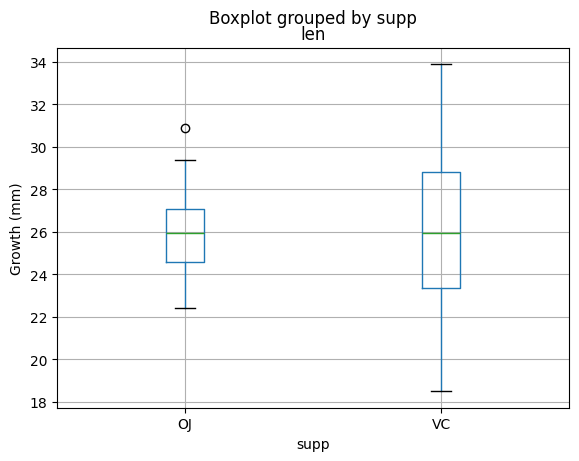

In [43]:
# A boxplot is a common way to show summary data for a small number of experimental groups succintly. But we'll limit our data to the 2.0 grams dosage.

dose2DF =  ToothGrowth[ToothGrowth['dose'] >1.5 ]
pd.plotting.boxplot(by='supp', column=['len'], data=dose2DF )
plt.ylabel('Growth (mm)')


It looks like the medians don't differ much. We can see how the means compare on a t-test: 

TtestResult(statistic=np.float64(0.04613610490923075), pvalue=np.float64(0.9637097790041267), df=np.float64(18.0))


Text(0, 0.5, 'pdf')

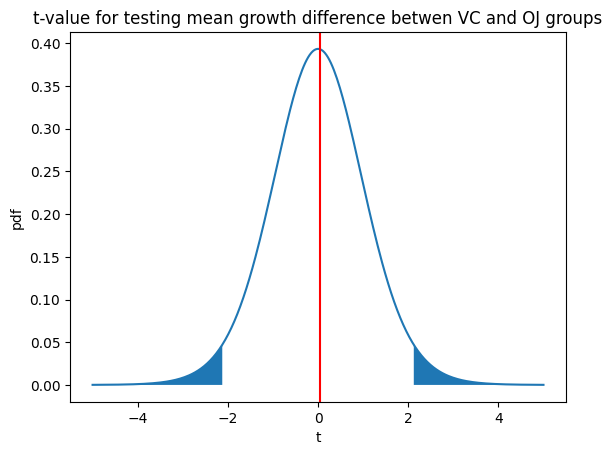

In [44]:

results = stats.ttest_ind(dose2DF[dose2DF['supp'].str.contains('VC')]['len'], dose2DF[dose2DF['supp'].str.contains('OJ')]['len'])
print(results)

# plot where the statistic falls on the t-curve
tFrame['DoF 18'] = [t(18).pdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 18 cdf'] = [t(18).cdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 18 0.95 tails'] = (tFrame['DoF 18 cdf'] < 0.025) | (tFrame['DoF 18 cdf'] > 0.975)


plt.plot('t_value', 'DoF 18', data=tFrame)
plt.axvline(x = results.statistic, color = "red", label = f"t-value {results.statistic:.3f}")

plt.fill_between('t_value', 'DoF 18', where='DoF 18 0.95 tails', data=tFrame)
plt.title("t-value for testing mean growth difference betwen VC and OJ groups")
plt.xlabel('t')
plt.ylabel('pdf')

Checking the effect of dosage gives a different result:

Text(0, 0.5, 'Growth (mm)')

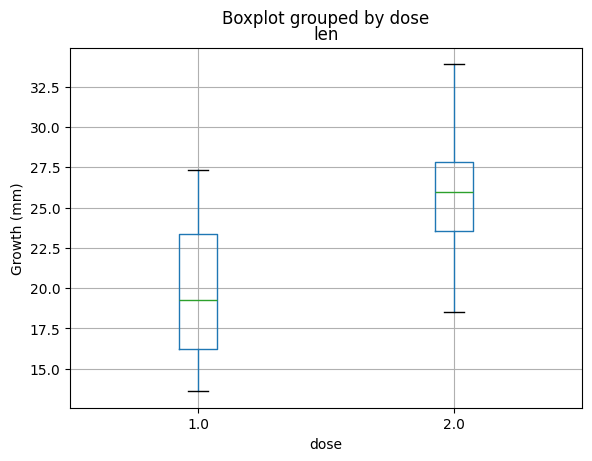

In [45]:
# A boxplot is a common way to show summary data for a small number of experimental groups succintly. 
# let's compare 2 doses.
dose2DF =  ToothGrowth[ToothGrowth['dose'] > 0.5 ]
pd.plotting.boxplot(by='dose', column=['len'], data=dose2DF )
plt.ylabel('Growth (mm)')


TtestResult(statistic=np.float64(4.90048431719355), pvalue=np.float64(1.8108285361817306e-05), df=np.float64(38.0))


Text(0, 0.5, 'pdf')

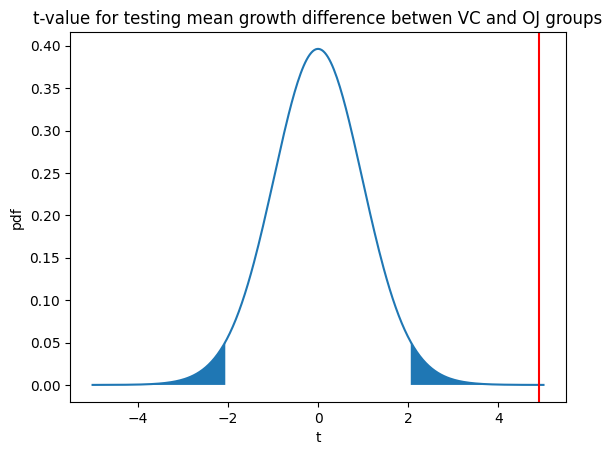

In [46]:
results = stats.ttest_ind(dose2DF[dose2DF['dose'] > 1.5 ]['len'], dose2DF[dose2DF['dose'] < 1.5]['len'])
print(results)

# plot where the statistic falls on the t-curve
tFrame['DoF 18'] = [t(38).pdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 38 cdf'] = [t(38).cdf(tval) for tval in tFrame['t_value']]
tFrame['DoF 38 0.95 tails'] = (tFrame['DoF 38 cdf'] < 0.025) | (tFrame['DoF 38 cdf'] > 0.975)


plt.plot('t_value', 'DoF 38', data=tFrame)
plt.axvline(x = results.statistic, color = "red", label = f"t-value {results.statistic:.3f}")

plt.fill_between('t_value', 'DoF 38', where='DoF 38 0.95 tails', data=tFrame)
plt.title("t-value for testing mean growth difference betwen VC and OJ groups")
plt.xlabel('t')
plt.ylabel('pdf')

## Linear Regression or "Line Fitting"

Regression refers to a sampling effect, in which a biased sample has the tendancy to show properties charateristic of the entire population.  The popular example is attributed to Sir Francis Galton, who noted the following: sons tend to be taller than their fathers; but if you select tall fathers (a selection bias for taller than average fathers), the sons of the biased selection of tall fathers tend to be shorter than their fathers (although those sons also tend to be taller than average).  

One consequence (when regression may be present) is that you have to be cautious about applying statistical reasoning and drawing conclusions when your selection isn't random; for example, if you separate your sample into different age groups or by socio-economic status for comparison.

In linear regression, this same idea - *regression* - is used in a similar fashion. We hypothesize a dependence of one experimental variables on another (Y depends on X). Values of Y measured for X should regress towards our hypothesized value of Y based on X. 

Various linear regression techniques can be used to fit a line to a set of data points; we are essentially hypothesizing a relation between two values as linear:

$$Y = mX + b$$

in graphical terms, $m$ is the slope and $b$ is the y-intercept.

Another way this is expressed is to say that x are predictors for y; or that the y-values are regressed against x (or against the formula). We also say the equation or formula is a *model* of the relatoniship between X and Y.

simple linear regression is available in the scipy stats package


**Regression fit of *mpg* against *displ* in *mtcars* dataset**

$$Y_{mpg} = m * X_{displ} + b$$

In [47]:
mtcars = pd.read_csv('datasets/mtcars.csv')
mtcars

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [48]:
results = stats.linregress(mtcars['disp'], mtcars['mpg'])
results


LinregressResult(slope=np.float64(-0.04121511996278613), intercept=np.float64(29.59985475616395), rvalue=np.float64(-0.8475513792624785), pvalue=np.float64(9.380326537381565e-10), stderr=np.float64(0.004711833309637007), intercept_stderr=np.float64(1.2297195153123273))

29.59985475616395 -0.04121511996278613


Text(0, 0.5, 'mpg')

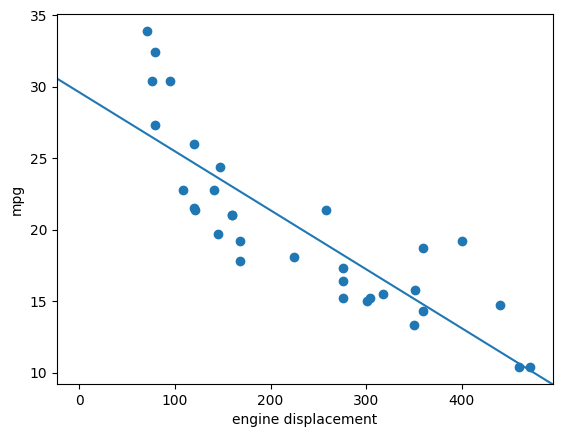

In [49]:
# plot a line fit with matplotlib
b, m = results.intercept, results.slope
print(b,m)

plt.scatter('disp','mpg',data=mtcars)
plt.axline(xy1=(0, b), slope=m)
plt.xlabel('engine displacement')
plt.ylabel('mpg')

In [51]:
mtcars['prediction'] = mtcars['disp'] * m + b
mtcars['residual'] = mtcars['mpg'] - mtcars['prediction']
mtcars

,manufacturer,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,prediction,residual
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,23.005436,-2.005436
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,23.005436,-2.005436
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,25.148622,-2.348622
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,18.966354,2.433646
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,14.762412,3.937588
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,20.326453,-2.226453
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,14.762412,-0.462412
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,23.553597,0.846403
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,23.796766,-0.996766
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,22.692201,-3.492201


Text(0, 0.5, 'mpg')

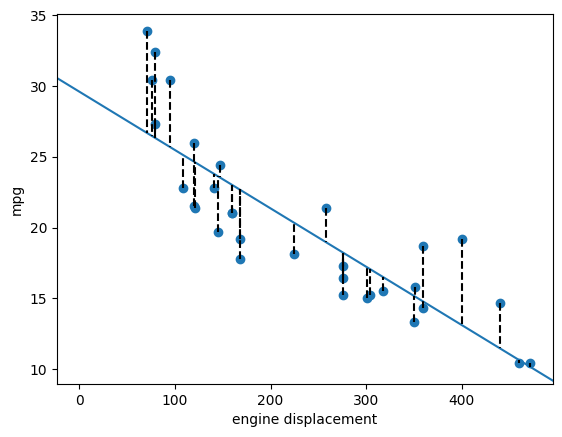

In [52]:
plt.scatter('disp','mpg',data=mtcars)
plt.axline(xy1=(0, b), slope=m)
plt.vlines('disp', 'mpg', 'prediction', data=mtcars, linestyles='--', color="black")
plt.xlabel('engine displacement')
plt.ylabel('mpg')

## Interpreting a regression fit

Residuals are important because they represent the part of the observed values *not* explained by the model. The investigator has to ask, "what causes the observations to vary from the model?"  Maybe a better model would reduce the residuals; maybe there is some problem with data; maybe there are other variables influencing the observations that isn't in the model.

In addition to examining residuals, a statistician can also draw on some summary information to evaluate the model.


In [ ]:
results

<span class=notcovered>We won't examine the stats theory behind these values</span>, but it is helpful to a least know what they mean.

* Residuals: difference between observed values and values predicted by the model.  If the residuals are randomly distributed around zero, a statistician might conclude the residuals are unbiased by other influences, or possibly the result of measurement errors. A scatterplot or boxplot of the residuals can help with this assessment.

In [ ]:
plt.boxplot('residual', data=mtcars)
plt.show()

* p-value: t-test for coeffients (m-slope and b-intercept) of the model (Pr>|t|): a t-test is constructed for each co-efficient using the value predicted by the model and X-observations.  The t-test uses the null hypothesis that the correct value for the coefficient is zero, which is rejected according to the low p-values in the above summary. So on the above summary results, we reject the hypothesis that (across the entire population, not just a sample) the correct coefficient for *disp* in our model is zero; which we interpret as meaning disp really does help predict mpg.
* residual standard error: is a measure of how much the residuals vary from the model; (characterized as "errors" in the observations). It is calculated like standard deviation, based on the number of data points in the sample.

* r-value: compares (by ratio) the variation in the residuals compared to the variation in the observed the Y-values. In other words, what proportion of the variance in the observations is explained by the model. Closer to 1.0, the more of the observation variation are explained by the model.

### Patterns in residuals

One way data analysts try to find additional relationships in the data is to look for patterns in residuals. This will indicate something else is influencing the outcome variable in a consistent manner. The drop lines for residuals on the regression chart might help show some patterns, but it will obscure other types of patterns. A boxplot will show unbalanced distributions, but not much else.  There are various ways to visualize the residuals.

## Advanced fitting


Maybe some other values are influencing the Y values, and could help explain more of the residuals. Scipy does not have the methods for **multiple linear regression**, but a lot of other packages do have it. Others will automate regression model finding, trying different factors until a good fit is found.

Multiple regression introduces additional visualization challenges: how do we show a three-dimensional line (where the axes could be mpg, displ and cyl) in a two-dimensional space?

There are also methods for fitting smooth curves, quadratics, cubics and spline curves. These are all worth exploring depending on the questions raised by your data set.